
# ANALÝZA PREDAJA

In [130]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px

### Prehľad analytických otázok

- Aký bol najlepší mesiac na predaj?


 - Ktoré mesto bolo najlepšie na predaj? Koľko sa zarobilo za ten mesiac?



- Kedy by sme mali zobrazovať reklamy, aby sme maximalizovali pravdepodobnosť nákupu produktu zákazníkom?



- Aké produkty sa najčastejšie predávajú spolu?



- Aký produkt sa najviac predával? Prečo si myslíte, že sa to predával najviac?

#### Načítanie dát

In [63]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [132]:
all_data.shape

(1487600, 11)

## Otázka č.1 -  Aký bol najlepší mesiac na predaj?

In [64]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494800 entries, 0 to 1494799
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Order ID          1490440 non-null  object
 1   Product           1490440 non-null  object
 2   Quantity Ordered  1490440 non-null  object
 3   Price Each        1490440 non-null  object
 4   Order Date        1490440 non-null  object
 5   Purchase Address  1490440 non-null  object
dtypes: object(6)
memory usage: 68.4+ MB


In [65]:
all_data = all_data.dropna()

In [133]:
all_data["Quantity Ordered"].unique()

array([2, 1, 3, 5, 4, 7, 6, 8, 9])

In [67]:
all_data = all_data.loc[all_data['Quantity Ordered'] != 'Quantity Ordered']

In [68]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype(int)

In [69]:
all_data["Price Each"] = all_data["Price Each"].astype(float)

In [70]:
all_data.insert(4, "Sales", value= (all_data["Quantity Ordered"] *all_data["Price Each"]) )

In [135]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,hour,minute,Purchase Address,month_name,city
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,8,46,"917 1st St, Dallas, TX 75001",April,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,22,30,"682 Chestnut St, Boston, MA 02215",April,Boston
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,38,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles


In [72]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])
all_data['month_name'] = all_data['Order Date'].dt.month_name()

C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_14200\120840377.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



1) Zoradenie mesiacov/ príprava na vizualizáciu dát do grafu

In [73]:
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]

all_data["month_name"] = pd.Categorical(all_data["month_name"], categories=months_order, ordered=True)

In [141]:

the_best_sales = all_data.groupby("month_name")["Sales"].sum().reset_index().sort_values(by="Sales",ascending=False)
the_best_sales

C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_14200\3654535570.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,month_name,Sales
11,December,36907546.72
9,October,29893815.04
3,April,27125361.92
10,November,25596825.60
4,May,25220854.00
2,March,22456803.04
6,July,21182206.08
5,June,20622418.08
7,August,17955743.04
1,February,17616179.36


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

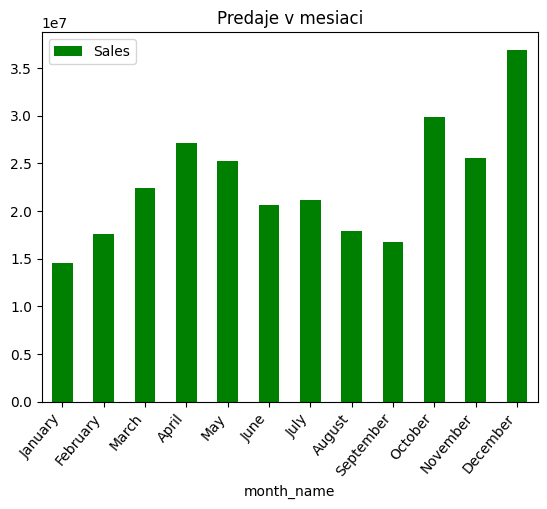

In [140]:
the_best_sales.plot(kind="bar", x="month_name",y="Sales", color="Green", title="Predaje v mesiaci")
plt.xticks(rotation=50, ha = "right")

- Interpretácia výsledkov: Decembrové predaj je najvyšší čo bude pravdepdobne zapričinené  sviatočnou atmosférou, rôznymi marketingovými akciami zameraných na sezónny dopyt. Aby obchodníci mohli plne využiť tieto faktory, mali by plánovať svoje predajné stratégie s ohľadom na tieto sezónne a emocionálne aspekty, čo môže viesť k optimalizácii predajov a maximalizácii ziskov v tomto kritickom období.

## Otázka č.2 - Ktoré mesto bolo najlepšie na predaj? Koľko sa zarobilo za ten mesiac?

In [75]:

all_data["Purchase Address"]= all_data["Purchase Address"].astype(str)
all_data['city'] = all_data["Purchase Address"].str.split(',').str[1].str.strip()
all_data["city"]




0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
1494795      Los Angeles
1494796    San Francisco
1494797    San Francisco
1494798    San Francisco
1494799    San Francisco
Name: city, Length: 1487600, dtype: object

In [76]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month_name,city
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Boston
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles


In [77]:
sales_city = all_data.groupby("city")["Sales"].sum().reset_index()
sales_city 

,city,Sales
0,Atlanta,22363988.64
1,Austin,14556654.00
2,Boston,29293136.08
3,Dallas,22143803.20
4,Los Angeles,43620566.40
5,New York City,37314539.44
6,Portland,18563924.88
7,San Francisco,66097631.28
8,Seattle,21982043.84


In [158]:
fig = px.bar(sales_city, x = "city",y="Sales",title = "<b>SALES BY CITY", color = "city",
             width = 1300,
             height=600 )

fig.update_layout(
    title_x = 0.5,
    legend_title_text='Mesto',
    
     
)
fig.update_xaxes(title_text='Mesto')

fig.update_yaxes(title_text='')

- Interpretácia výsledkov: Najvyšší predaj v našom portfóliu produktov bol zaznamenaný v meste San Francisco, kde dosiahol  sumu 66,097,631.28M. Tento výsledok predstavuje významný podiel na celkových predajoch a naznačuje vynikajúcu výkonnosť v tomto meste.

## Otázka č.3 -  Kedy by sme mali zobrazovať reklamy, aby sme maximalizovali pravdepodobnosť nákupu produktu zákazníkom?

In [80]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,month_name,city
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Boston
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles


In [81]:
all_data.insert(6, "hour", all_data["Order Date"].dt.hour)
all_data.insert(7, "minute", all_data["Order Date"].dt.minute)

In [161]:
hour_sales = all_data.groupby("hour")["Quantity Ordered"].count().reset_index()
fig = px.line(hour_sales , x="hour", y="Quantity Ordered", markers=True, title= "<b>Počet objednávok na základe hodiny počas celého dňa")

fig.update_xaxes(tickmode='linear', dtick=1)

fig.update_xaxes(title_text='Hodina')
fig.update_yaxes(title_text='Objednané množstvo')

## Otázka č.4 - Aké produkty sa najčastejšie predávajú spolu?

In [162]:
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,hour,minute,Purchase Address,month_name,city
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,8,46,"917 1st St, Dallas, TX 75001",April,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,22,30,"682 Chestnut St, Boston, MA 02215",April,Boston
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,38,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,38,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,9,27,"333 8th St, Los Angeles, CA 90001",April,Los Angeles


In [163]:
from itertools import combinations
from collections import Counter

In [164]:
df_filtered = all_data[all_data.duplicated('Order ID', keep=False)]


grouped = df_filtered.groupby('Order ID')['Product'].apply(list)

product_combinations = grouped.apply(lambda x: [(a, b) for a, b in combinations(x, 2) if a != b])

combination_counts = Counter([item for sublist in product_combinations for item in sublist])


most_common_combination = combination_counts.most_common(5)

print(most_common_combination)

[(('iPhone', 'Lightning Charging Cable'), 36460), (('Google Phone', 'USB-C Charging Cable'), 35868), (('Lightning Charging Cable', 'iPhone'), 28500), (('USB-C Charging Cable', 'Google Phone'), 28068), (('iPhone', 'Wired Headphones'), 16512)]


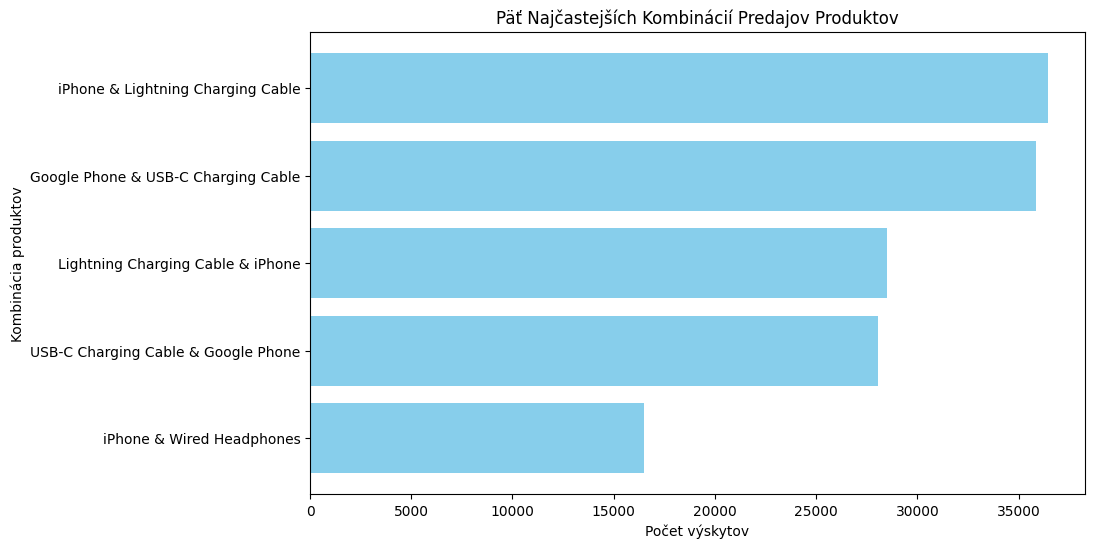

In [165]:
# Rozdelenie dvojíc produktov a ich počtov
products, counts = zip(*most_common_combination)

# Konverzia dvojíc na reťazce kvôli zobrazeniu v grafe
products = [f"{a} & {b}" for a, b in products]


plt.figure(figsize=(10, 6))
plt.barh(products, counts, color='skyblue')
plt.xlabel('Počet výskytov')
plt.ylabel('Kombinácia produktov')
plt.title('Päť Najčastejších Kombinácií Predajov Produktov')
plt.gca().invert_yaxis()  # Prevrátenie osí pre lepšiu čitateľnosť
plt.show()

## Otázka č.5 - Aký produkt sa najviac predával? Prečo si myslíte, že sa to predával najviac?

In [166]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,hour,minute,Purchase Address,month_name,city
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,8,46,"917 1st St, Dallas, TX 75001",April,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,22,30,"682 Chestnut St, Boston, MA 02215",April,Boston
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,38,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,38,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,9,27,"333 8th St, Los Angeles, CA 90001",April,Los Angeles


In [169]:

grouped = all_data.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'}).reset_index()
grouped


,Product,Quantity Ordered,Price Each
0,20in Monitor,33032,109.99
1,27in 4K Gaming Monitor,49952,389.99
2,27in FHD Monitor,60400,149.99
3,34in Ultrawide Monitor,49592,379.99
4,AA Batteries (4-pack),221080,3.84
5,AAA Batteries (4-pack),248136,2.99
6,Apple Airpods Headphones,125288,150.00
7,Bose SoundSport Headphones,107656,99.99
8,Flatscreen TV,38552,300.00
9,Google Phone,44256,600.00


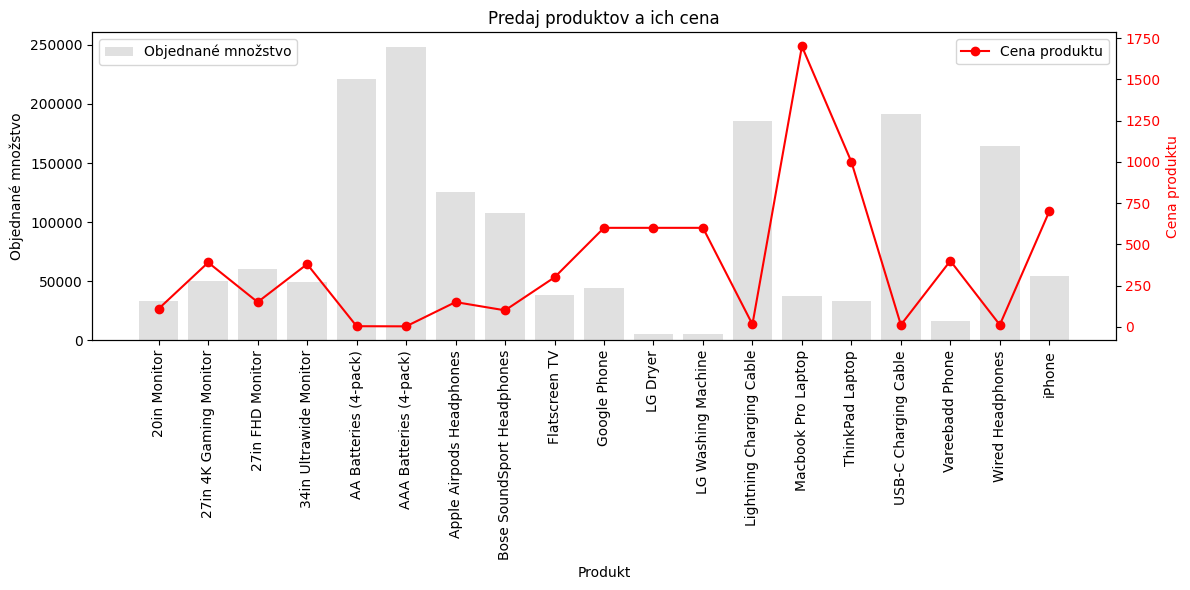

In [177]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Stĺpcový graf pre množstvo objednávok
ax1.bar(grouped['Product'], grouped['Quantity Ordered'], color='lightgray', alpha=0.7, label='Objednané množstvo')
ax1.set_xlabel('Produkt')
ax1.set_ylabel('Objednané množstvo', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Vytvorenie druhého y-ax pre cenu
ax2 = ax1.twinx()  
ax2.plot(grouped['Product'], grouped['Price Each'], color='red', marker='o', linestyle='-', label='Cena produktu')
ax2.set_ylabel('Cena produktu', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Pridanie názvu a legendy
plt.title('Predaj produktov a ich cena')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


# Nastavenie vertikálnych názvov na osi X
ax1.set_xticks(grouped['Product'])
ax1.set_xticklabels(grouped['Product'], rotation=90, ha='center')

plt.tight_layout()  
plt.show()

- Interpretácia výsledkov : U niektorých produktov je inverzný vzťah medzi cenou a objednaným množstvom. Napríklad, AA batérie a AAA batérie majú nízke ceny a vysoké objednané množstvá, zatiaľ čo MacBook Pro laptop má vysokú cenu, ale relatívne nižšie objednané množstvo.
Niektoré produkty, ako napríklad USB-C nabíjací kábel, dosahujú rovnováhu medzi cenou a objednaným množstvom, čo môže naznačovať, že sú vnímané ako produkty s dobrou hodnotou.